In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

data =[]
files = []
for f in glob.glob('*_Stages_Times_Sec.csv'):
    files.append(f)
    temp_df = pd.read_csv(f)
    data.append(temp_df)
    print(f'Δημιουργήθηκε dataframe για το {f} με {temp_df.shape}')


total = pd.concat(data, axis=0)


Δημιουργήθηκε dataframe για το Aigio_Stages_Times_Sec.csv με (69, 9)
Δημιουργήθηκε dataframe για το Almiros_Stages_Times_Sec.csv με (99, 9)
Δημιουργήθηκε dataframe για το Boiotias_Stages_Times_Sec.csv με (204, 9)
Δημιουργήθηκε dataframe για το Fthiotidas_G_Stages_Times_Sec.csv με (111, 9)
Δημιουργήθηκε dataframe για το Fthiotidas_T_Stages_Times_Sec.csv με (183, 9)
Δημιουργήθηκε dataframe για το Kentavros_Stages_Times_Sec.csv με (271, 9)
Δημιουργήθηκε dataframe για το Livadia_Stages_Times_Sec.csv με (131, 9)
Δημιουργήθηκε dataframe για το Olympiako_Stages_Times_Sec.csv με (218, 9)
Δημιουργήθηκε dataframe για το Potamies_Stages_Times_Sec.csv με (49, 9)
Δημιουργήθηκε dataframe για το Stereas_Stages_Times_Sec.csv με (207, 9)


In [8]:
#total_ss_times_C6 = total.loc[(total['Gr/Cl'].str.contains('C6') & total['surface'] == 'Gravel')]
total_ss_times_C6 = total[(total['Gr/Cl'].str.contains('C6')) & (total['surface'] == 'Gravel')]
total_ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
30,Giannakopoulos,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,31,611.93
34,Englezos T. -,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,35,621.69
36,Agelis Elias,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,37,623.05
38,Gazetas Dionis,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,39,636.39
42,Pavli Marialen,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,43,650.79
...,...,...,...,...,...,...,...,...,...
179,Giokaris S. -,C6 F2,4,Stereas,4/6/2023,Gravel,Championship,28,1111.59
193,Manouskos Elia,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,14,1185.78
196,Panagiotopoulo,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,17,1201.82
198,Stavropoulos D,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,19,1209.73


In [9]:
min_value = total_ss_times_C6.groupby(['Race', 'ss'])['time_SS_sec'].min()

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race         ss          
Boiotias     1     611.93
             2     434.69
             3     564.95
             4     424.65
Fthiotidas_G 1     853.10
             2    1429.04
             3     876.46
             4    1469.28
Livadia      1     737.30
             2     689.04
             3     682.25
Olympiako    1     562.77
             2     716.37
             3     523.58
             4     713.57
             5     724.00
             6     698.92
Stereas      1     233.50
             2     842.34
             3    1201.39
             4     843.46
             5    1185.78

In [16]:
total_ss_times_F = total_ss_times_C6.merge(min_value2, on=['Race', 'ss'])
#total_ss_times_F['SS.'] = total_ss_times_F['Race'] + '_' +  total_ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F['SS.'] = total_ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F['Crew'] = total_ss_times_F['Crew'].str[:9]
#total_ss_times_F.to_csv('greek_rallies_2023_stages_times.csv', index=False)

In [17]:
total_ss_times_F['diff']=total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time']
total_ss_times_F['diff%']=(total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time'])/total_ss_times_F['min_time']*100
total_ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,diff,diff%
0,Giannakop,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,31,611.93,611.93,01,0.00,0.000000
1,Englezos,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,35,621.69,611.93,01,9.76,1.594954
2,Agelis El,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,37,623.05,611.93,01,11.12,1.817201
3,Gazetas D,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,39,636.39,611.93,01,24.46,3.997189
4,Pavli Mar,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,43,650.79,611.93,01,38.86,6.350400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Giokaris,C6 F2,4,Stereas,4/6/2023,Gravel,Championship,28,1111.59,843.46,04,268.13,31.789296
115,Manouskos,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,14,1185.78,1185.78,05,0.00,0.000000
116,Panagioto,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,17,1201.82,1185.78,05,16.04,1.352696
117,Stavropou,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,19,1209.73,1185.78,05,23.95,2.019768


In [18]:
total_ss_times_F4 = pd.pivot_table(total_ss_times_F, values='diff', 
                                index=['Race', 'SS.'], 
                                columns='Crew', dropna=True)

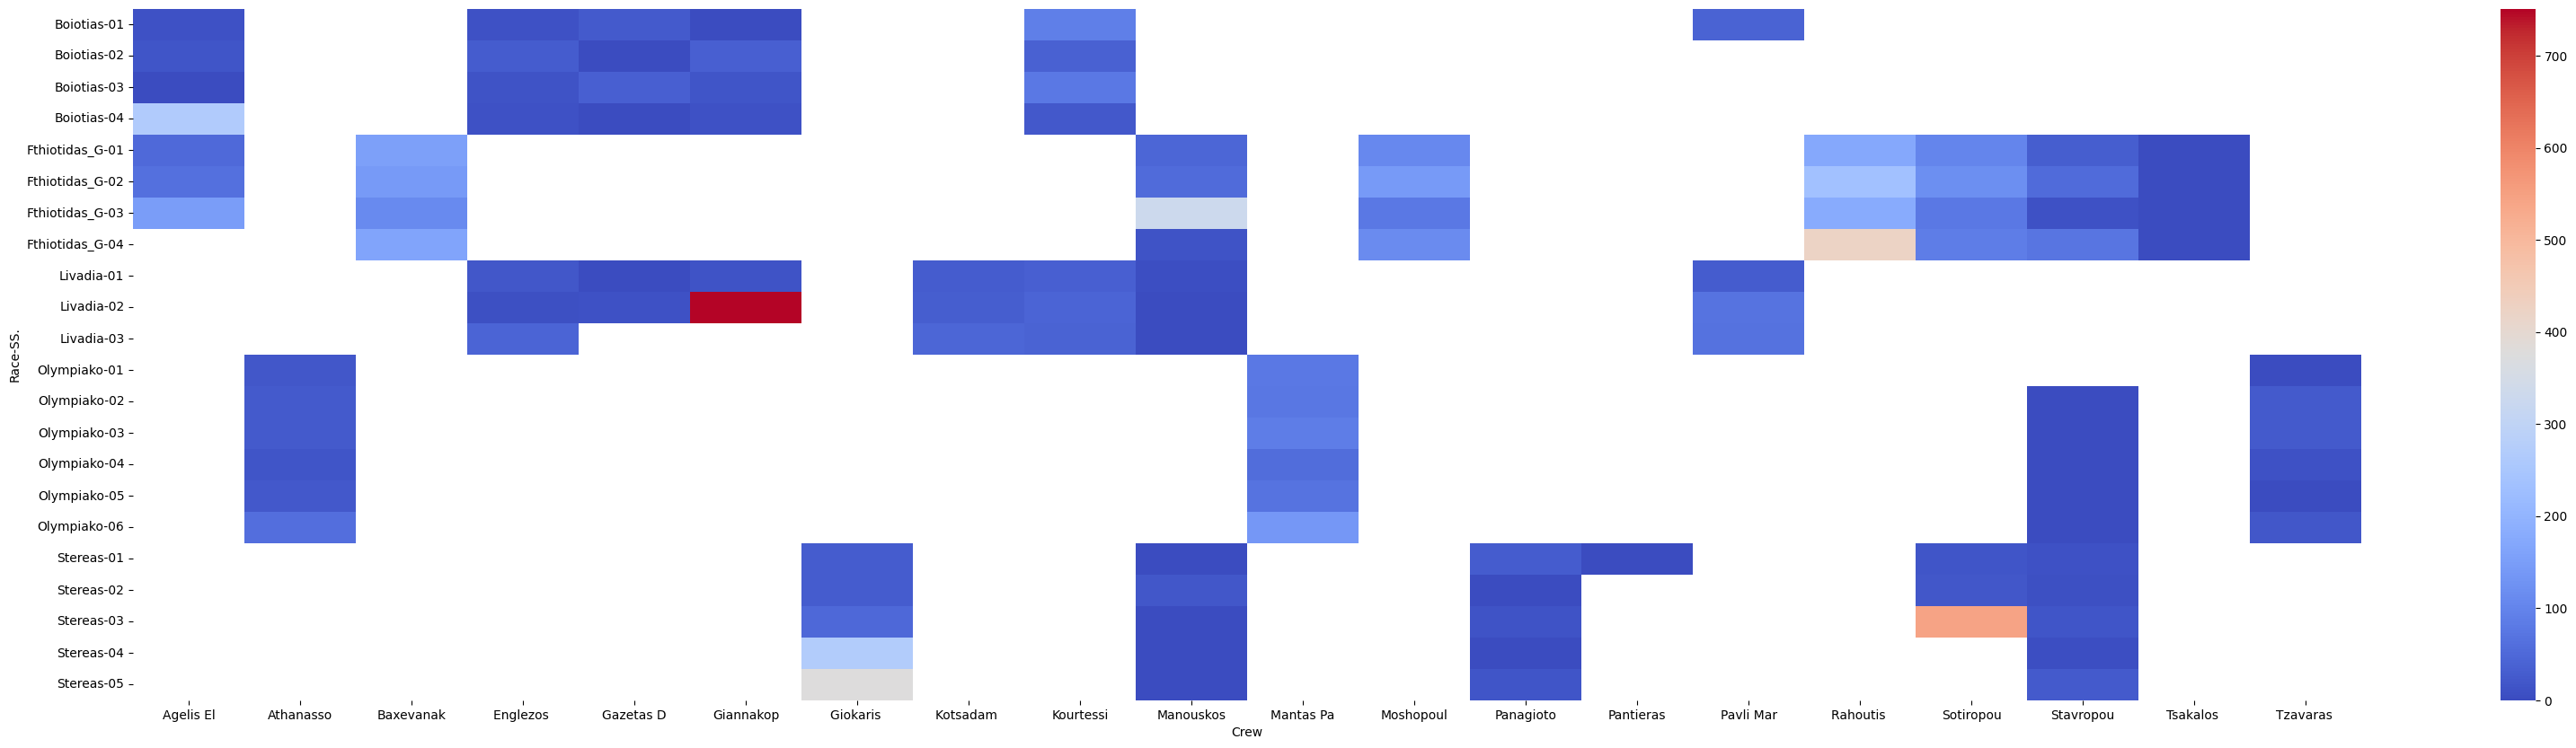

In [20]:
fig,ax = plt.subplots()
fig.set_size_inches(40,10)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F4, cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.savefig("C6.jpg")
plt.show()

In [21]:
total_ss_times_F5 = pd.pivot_table(total_ss_times_F, values='diff', 
                                columns=['Race', 'SS.'], 
                                index='Crew', dropna=True)
total_ss_times_F6 = pd.pivot_table(total_ss_times_F, values='diff%', 
                                columns=['Race', 'SS.'], 
                                index='Crew', dropna=True)
total_ss_times_F6

Race        Boiotias                                 Fthiotidas_G             \
SS.               01        02         03         04           01         02   
Crew                                                                           
Agelis El   1.817201  3.473740   0.000000  62.555045     6.008674   4.360970   
Athanasso        NaN       NaN        NaN        NaN          NaN        NaN   
Baxevanak        NaN       NaN        NaN        NaN    18.152620   9.947237   
Englezos    1.594954  6.510387   2.198425   2.571529          NaN        NaN   
Gazetas D   3.997189  0.000000   5.814674   0.000000          NaN        NaN   
Giannakop   0.000000  7.582415   2.639172   2.630402          NaN        NaN   
Giokaris         NaN       NaN        NaN        NaN          NaN        NaN   
Kotsadam         NaN       NaN        NaN        NaN          NaN        NaN   
Kourtessi  14.647100  8.348478  13.772900   5.244319          NaN        NaN   
Manouskos        NaN       NaN        NaN        NaN     5.178760   3.883026   
Mantas Pa        NaN       NaN        NaN        NaN          NaN        NaN   
Moshopoul        NaN       NaN        NaN        NaN    12.513187  10.017914   
Panagioto        NaN       NaN        NaN        NaN          NaN        NaN   
Pantieras        NaN       NaN        NaN        NaN          NaN        NaN   
Pavli Mar   6.350400       NaN        NaN        NaN          NaN        NaN   
Rahoutis         NaN       NaN        NaN        NaN    20.015239  16.300453   
Sotiropou        NaN       NaN        NaN        NaN    11.870824   8.406343   
Stavropou        NaN       NaN        NaN        NaN     3.540030   3.820047   
Tsakalos         NaN       NaN        NaN        NaN     0.000000   0.000000   
Tzavaras         NaN       NaN        NaN        NaN          NaN        NaN   

Race                              Livadia              ...  Olympiako  \
SS.               03         04        01          02  ...         02   
Crew                                                   ...              
Agelis El  16.934030        NaN       NaN         NaN  ...        NaN   
Athanasso        NaN        NaN       NaN         NaN  ...   3.579156   
Baxevanak  12.561897  11.151040       NaN         NaN  ...        NaN   
Englezos         NaN        NaN  2.468466    1.158133  ...        NaN   
Gazetas D        NaN        NaN  0.000000    1.663184  ...        NaN   
Giannakop        NaN        NaN  1.611284  108.986416  ...        NaN   
Giokaris         NaN        NaN       NaN         NaN  ...        NaN   
Kotsadam         NaN        NaN  3.777296    4.326309  ...        NaN   
Kourtessi        NaN        NaN  4.748406    6.291362  ...        NaN   
Manouskos  37.651462   0.888190  0.726977    0.000000  ...        NaN   
Mantas Pa        NaN        NaN       NaN         NaN  ...  10.469450   
Moshopoul   8.955343   7.657492       NaN         NaN  ...        NaN   
Panagioto        NaN        NaN       NaN         NaN  ...        NaN   
Pantieras        NaN        NaN       NaN         NaN  ...        NaN   
Pavli Mar        NaN        NaN  3.804422    9.838326  ...        NaN   
Rahoutis   20.151519  28.944789       NaN         NaN  ...        NaN   
Sotiropou   8.838966   5.842998       NaN         NaN  ...        NaN   
Stavropou   1.309814   4.933028       NaN         NaN  ...   0.000000   
Tsakalos    0.000000   0.000000       NaN         NaN  ...        NaN   
Tzavaras         NaN        NaN       NaN         NaN  ...   3.295783   

Race                                                   Stereas            \
SS.               03        04        05         06         01        02   
Crew                                                                       
Agelis El        NaN       NaN       NaN        NaN        NaN       NaN   
Athanasso   4.986821  2.261866  2.837017   8.584673        NaN       NaN   
Baxevanak        NaN       NaN       NaN        NaN        NaN       NaN   
Englezos         NaN   

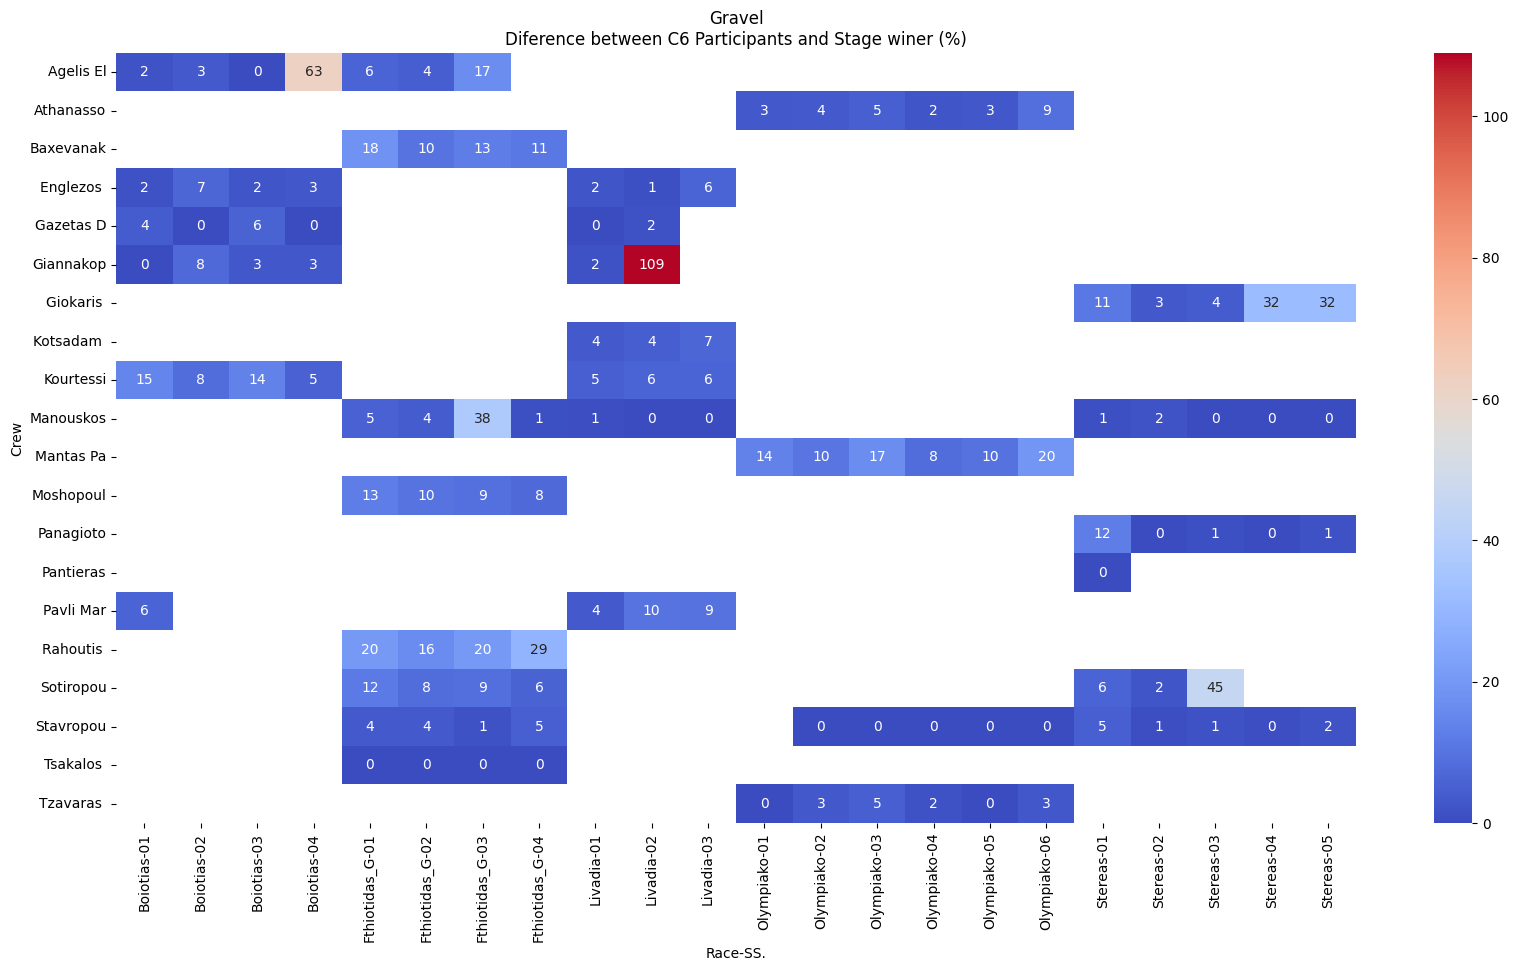

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F5, cmap='coolwarm', cbar=False)
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
#plt.savefig("C6_2.jpg")

fig.set_size_inches(20,10)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL_2 = sns.heatmap(total_ss_times_F6, annot=True, fmt=',.0f',cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.title('Gravel' +'\nDiference between C6 Participants and Stage winer (%)')
plt.savefig("C6_Grave.jpg")
plt.show()